<a href="https://colab.research.google.com/github/PalmerTurley34/DS-Unit-2-Applied-Modeling/blob/master/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [72]:
import pandas as pd
import numpy as np
! unzip /content/insurance.zip

Archive:  /content/insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
df = pd.read_csv('insurance.csv')

In [89]:
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Target will be charges. It is a regression target.

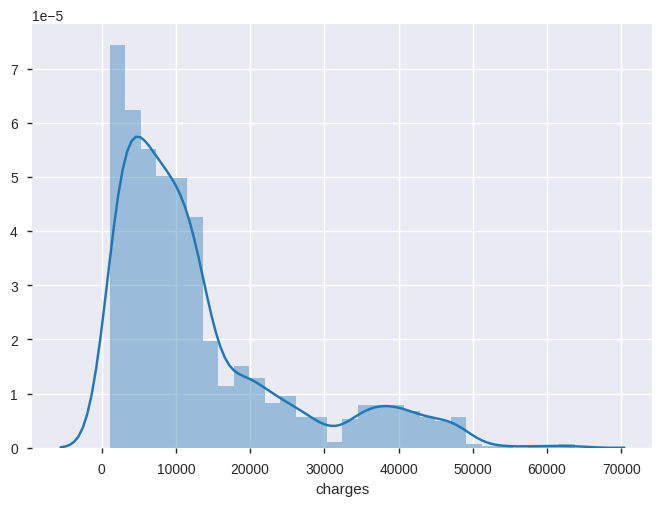

In [90]:
import seaborn as sns
sns.distplot(df['charges']);

The target is right skewed. I'll log transform the target. Mean absolute error would be a good metric to use for this dataset.

In [92]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [93]:
df.describe(exclude='number')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


I'll do a random split for train, validation, and testing, using all the observations.

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=.8, test_size=.2)

In [95]:
train.shape, test.shape

((1070, 7), (268, 7))

## Data Exploration

In [96]:
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

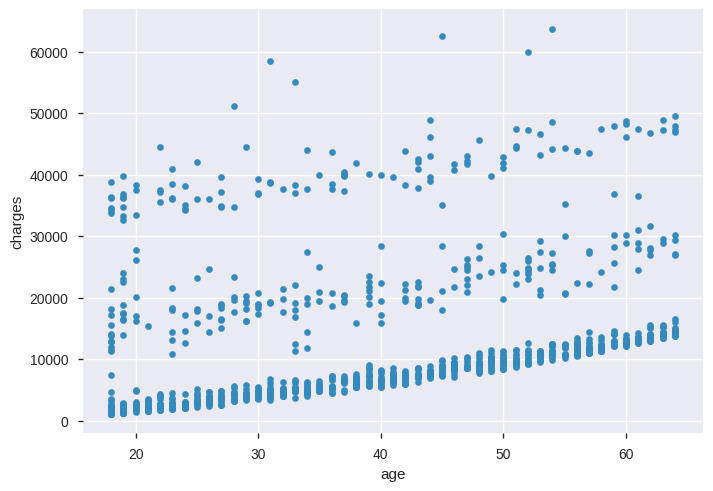

In [97]:
# good correlation
train.plot.scatter('age', 'charges');

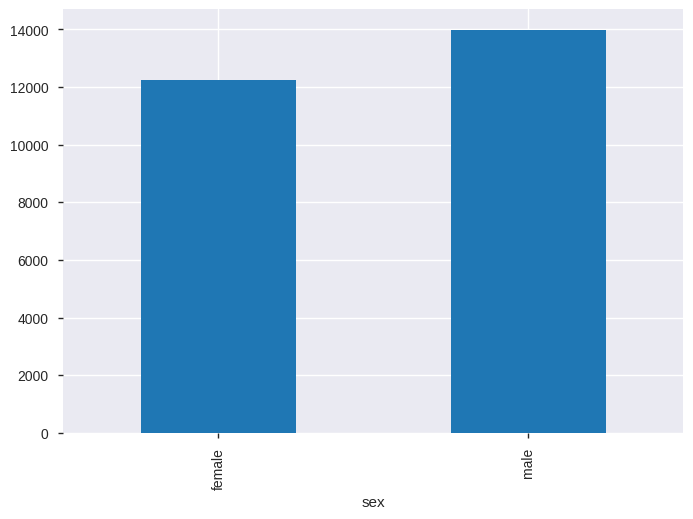

In [98]:
# very little correlation with the target
sex = train.groupby('sex').mean()

sex['charges'].plot.bar();

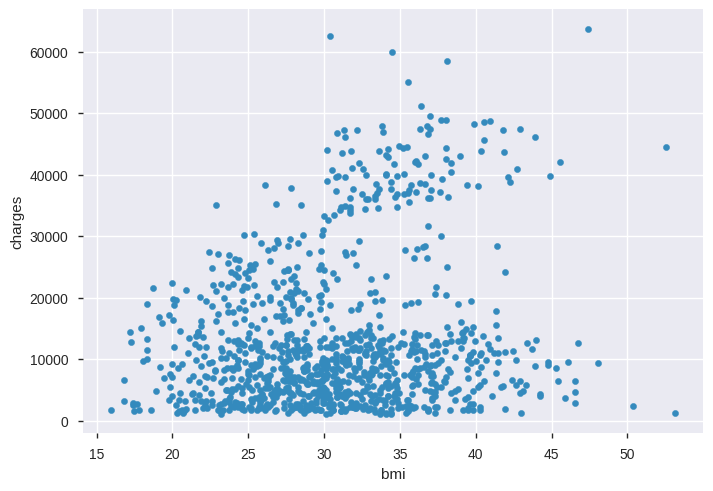

In [99]:
# some correlation here
train.plot.scatter('bmi', 'charges');

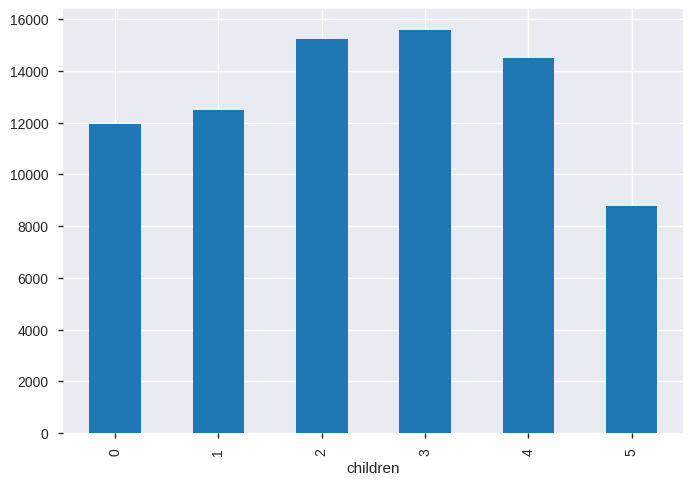

In [100]:
# good correlation
children = train.groupby('children').mean()
children['charges'].plot.bar();

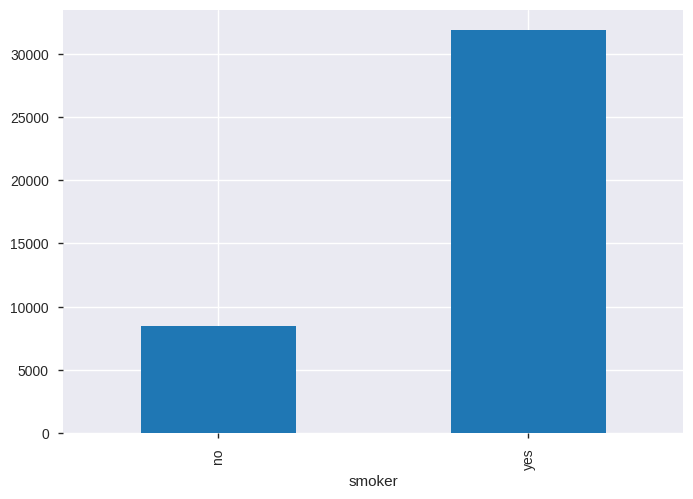

In [101]:
# really good correlation here
smoker = train.groupby('smoker').mean()
smoker['charges'].plot.bar();

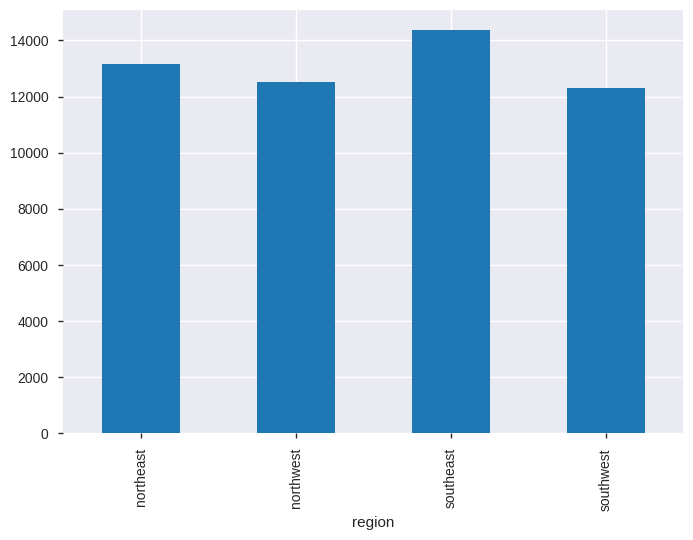

In [102]:
# very little correlation
region = train.groupby('region').mean()
region['charges'].plot.bar();